In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку из дискретного распределения

In [4]:
X = np.random.choice([1, 2, 3, 4], 30)

Посчитаем вероятности $\bar{p_1}, \bar{p_2}, \bar{p_3}, \bar{p_4}$ по выборке 

$$\bar{p}_k = \frac{1}{n} \sum_{i=0}^n [X_i = a_k], $$


In [7]:
## напишите решение здесь
X = np.random.choice([1, 2, 3, 4], 1000)
a = [1,2,3,4]
n=30
p = np.zeros(len(a))
for i in range(len(a)):
    for j in range(n):
        if a[i]==X[j]:
            p[i]+=1
prob = p / n
prob

array([0.13333333, 0.33333333, 0.43333333, 0.1       ])

Сгенерируем выборку из непрерывного распределения 

In [64]:
## выберите любимое распределение и сгенерируйте выборку размера 100
#random_val = sts.norm(loc=5, scale=3)
#random_val = sts.pareto(2, loc=0, scale=1)
#random_val = sts.cauchy()
random_val = sts.expon(3)
sample = random_val.rvs(50)

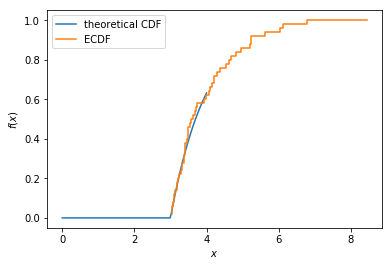

In [65]:
# выберите подходящий масштаб
x = np.linspace(0,4,100)
cdf = random_val.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Построение гистограммы

Text(0.5,0,'$x$')

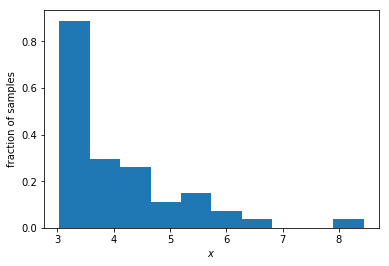

In [66]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

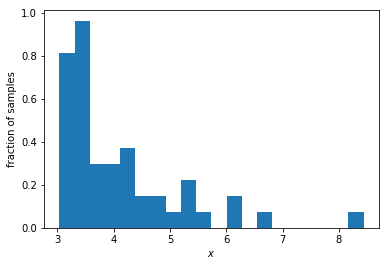

In [67]:
plt.hist(sample, bins=20, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Определить матож, медиану и моду нормального распределения, равномерного распределения

In [41]:
## решение здесь

Оценим параметры дисперсии нормального, экспоненциального распределения

$$\bar{X} = \frac 1n \sum_i X_i $$

$$m = \begin{cases}
X_{(n / 2)},\ n = 2k \\
\dfrac{X_{(n / 2)} + X_{(n / 2) + 1}}{2},\ n = 2k + 1 \\
\end{cases}$$

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

In [92]:
## решение здесь
n=1000
norm_rv = sts.norm(1,2)
sample = norm_rv.rvs(n)

mean_x = sum(sample)//n
mean_x

1.0

In [94]:
median_x = sorted(sample)[n//2]
median_x

1.0335089188908675

In [95]:
var_x = (1 / (n-1))*np.sum([(sample[i]-mean_x)**2 for i in range(n)])
var_x

4.015378380893958

In [97]:
sample.mean()

1.081827202932638

In [98]:
sample.var()

4.004667311373286

## ЦПТ

Text(0.5,0,'$x$')

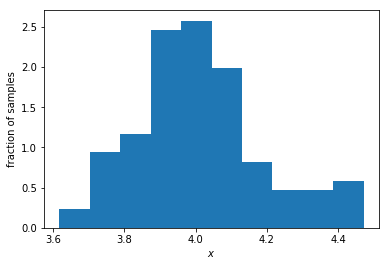

In [109]:
results = []
n = 30
exp_rv = sts.expon(3)
for i in range(100):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, bins=10, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

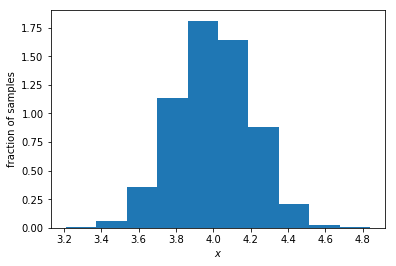

In [110]:
results = []
n = 100
exp_rv = sts.poisson(4)
for i in range(10000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [49]:
# проверьте свое распределение на удовлетворение ЦПТ